## Table of Contents 
### 01. Importing Libraries and Data
### 02. Considering Security Implications
### 03. Comparing customer behavior in different geographic areas
### 04. Removing Low Activity Customers
### 05. Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
### 06. Creating appropriate visualizations to show the distribution of profiles.
### 07. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
### 08. Comparing customer profiles with regions and departments
###     Additional Charts

# 01. Importing Libraries and Data 

In [3]:
#importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#creating a path
path = r'C:\Users\canam\Achievement 4\Instacart Basket Analysis'

In [5]:
#importing merged version of data with customer columns 
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [6]:
#checking output
df_ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


# 02. Considering Security Implications

In [8]:
#the columns first_name & last_name have PII
#we must drop the columns 
df_ords_prods_cust = df_ords_prods_cust.drop(columns = ['first_name', 'last_name'], axis = 1) 

In [9]:
#checking to see that the columns were dropped
df_ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,median_days_since_last_order,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [10]:
#columns dropped successfully

# 03. Comparing customer behavior in different geographic areas

In [12]:
#creating a “Region” column based on the “State” column
#creating a Northeast region
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'] 

In [13]:
#creating a Midwest region 
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']  
        

In [14]:
#creating a South region
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']  

In [15]:
#creating a West region
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [16]:
#creating a region column based on previously defined regions 
#creating a Northeast region
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(Northeast),'region']= 'Northeast'

In [17]:
#creating Midwest region 
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(Midwest),'region']= 'Midwest'

In [18]:
#creating a South region
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(South),'region']= 'South'

In [19]:
#creating a West region
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(West),'region']= 'West'

In [20]:
#checking to see that the region column was created
df_ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest


In [21]:
#checking the values of the new region column
df_ords_prods_cust['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [22]:
#Determining whether there’s a difference in spending habits between different regions by creating a region and spending_flag crosstab
spending_habits_by_region = pd.crosstab(df_ords_prods_cust['region'], df_ords_prods_cust['spending_flag'], dropna = False)

In [23]:
spending_habits_by_region

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31223,8261690


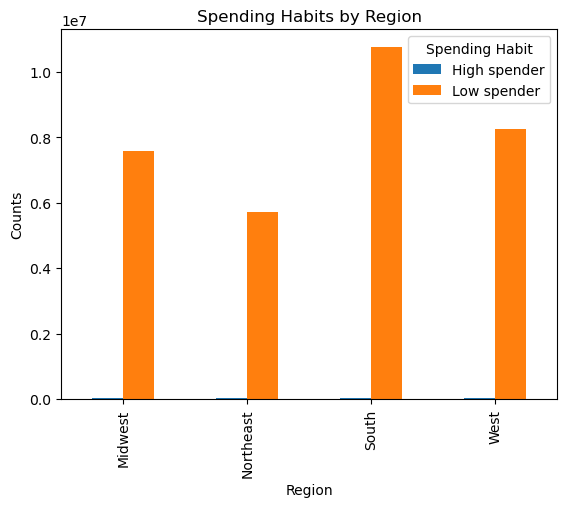

In [24]:
bar_spending_habits_by_region = spending_habits_by_region.plot.bar()
plt.title('Spending Habits by Region')
plt.xlabel('Region')
plt.ylabel('Counts')
plt.legend(title='Spending Habit')

For every region, there is a significantly larger number of low spenders than there are high spenders.
The South has the most low spenders while the Northeast has the least.

In [26]:
bar_spending_habits_by_region.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'bar_spending_habits_by_region.png')), bbox_inches='tight')

# 04. Removing Low Activity Customers 

In [28]:
#creating flag for low activity customers
df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'Low Activity'

In [29]:
#creating flag for high activity customers
df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] >= 5, 'activity_flag'] = 'High Activity'

In [30]:
#checking to see if activity_flag has been added
df_ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,High Activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,High Activity
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,High Activity
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,Low Activity
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,Low Activity


In [31]:
#activity flag successfully added

In [32]:
#cheking the values for the new activity_flag column
df_ords_prods_cust['activity_flag'].value_counts(dropna = False)

activity_flag
High Activity    30964564
Low Activity      1440295
Name: count, dtype: int64

In [33]:
#checking shape
df_ords_prods_cust.shape

(32404859, 34)

In [34]:
#excluding low activity customers from the data
df_high_activity =  df_ords_prods_cust[df_ords_prods_cust['activity_flag']=='High Activity']

In [35]:
df_high_activity.shape

(30964564, 34)

In [36]:
#df_high_activity has the same amount of rows as frequency count

In [37]:
#exporting df_high_activity dataframe 
df_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_high_activity.pkl'))

In [38]:
#exporting df_cust_ords_cust which includes region and activity flag
df_ords_prods_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_region_activity.pkl'))

In [39]:
#changing df_ords_prods_cust to only include high activity customers 
df_ords_prods_cust = df_high_activity

In [40]:
#checking shape 
df_ords_prods_cust.shape

(30964564, 34)

In [41]:
#shapes match

# 05. Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

## Age Variable

In [44]:
#creating profiling variable based on age
#creating an 'Adult' age group
df_ords_prods_cust.loc[df_ords_prods_cust['age'] < 40, 'age_group'] = 'Adult'

In [45]:
#creating a 'Middle Adult' age group
df_ords_prods_cust.loc[(df_ords_prods_cust['age'] >= 40) & (df_ords_prods_cust['age'] <65), 'age_group'] = 'Middle Adult'

In [46]:
#creating a 'Senior Adult' age group 
df_ords_prods_cust.loc[df_ords_prods_cust['age'] >= 65, 'age_group'] = 'Senior Adult'

In [47]:
#checking to see if age group has been added
df_ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,High Activity,Senior Adult
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,High Activity,Senior Adult
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Vermont,66,6/16/2018,2,married,158302,both,Northeast,High Activity,Senior Adult
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Hawaii,51,1/4/2019,2,married,57797,both,West,High Activity,Middle Adult
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,South,High Activity,Adult


In [48]:
#checking values in the new age group column 
df_ords_prods_cust['age_group'].value_counts(dropna = False)

age_group
Middle Adult    12103910
Adult           10665110
Senior Adult     8195544
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x204b417a0f0>,
 [Text(0, 0, 'Middle Adult: >=40 & <65 years'),
  Text(1, 0, 'Adult: <40 years'),
  Text(2, 0, 'Senior Adult:>=65 years')])

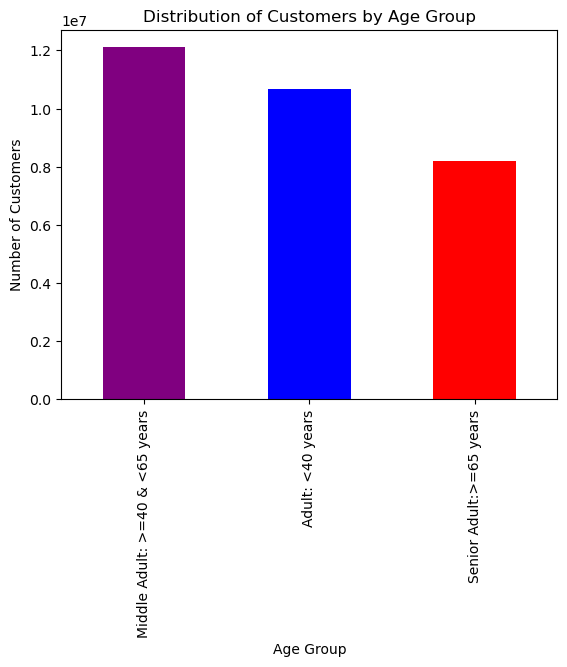

In [79]:
#creating a bar graph of age groups
bar_age_group = df_ords_prods_cust['age_group'].value_counts().plot.bar(color=['purple', 'blue', 'red'])
plt.title('Distribution of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(np.arange(3), ['Middle Adult: >=40 & <65 years', 'Adult: <40 years', 'Senior Adult:>=65 years'])

In [81]:
#exporting the bar graph 
bar_age_group.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'Distribution of Customers by Age Group.png',)), bbox_inches='tight')

## Income Variable

In [84]:
#creating a profiling variable based on income
#creating a 'Low Income' group 
df_ords_prods_cust.loc[df_ords_prods_cust['income'] < 55000, 'income_level'] = 'Low Income'

In [86]:
#creating a 'Middle Income' group 
df_ords_prods_cust.loc[(df_ords_prods_cust['income'] >= 55000) & (df_ords_prods_cust['income'] <110000), 'income_level'] = 'Middle Income'

In [88]:
#creating a 'High Income' group 
df_ords_prods_cust.loc[df_ords_prods_cust['income'] >= 110000, 'income_level'] = 'High Income'

In [90]:
#checking to see if income_level has been added
df_ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_group,income_level
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,81,8/1/2019,1,married,49620,both,Midwest,High Activity,Senior Adult,Low Income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,81,8/1/2019,1,married,49620,both,Midwest,High Activity,Senior Adult,Low Income
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,66,6/16/2018,2,married,158302,both,Northeast,High Activity,Senior Adult,High Income
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,51,1/4/2019,2,married,57797,both,West,High Activity,Middle Adult,Middle Income
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,20,5/8/2019,3,living with parents and siblings,34171,both,South,High Activity,Adult,Low Income


In [92]:
#checking the values of the new income level column
df_ords_prods_cust['income_level'].value_counts(dropna = False)

income_level
Middle Income    14941716
High Income      11570460
Low Income        4452388
Name: count, dtype: int64

Text(0, 0.5, 'Count')

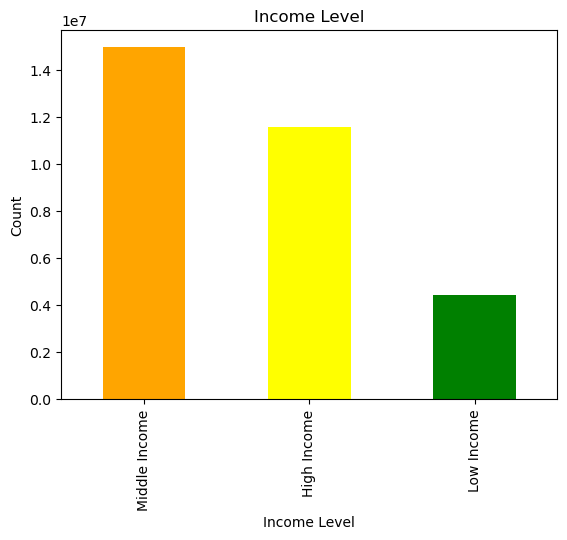

In [94]:
#creating a bar graph for income level
bar_income_level = df_ords_prods_cust['income_level'].value_counts().plot.bar(color=['orange', 'yellow', 'green'])
plt.title('Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')


In [96]:
#exporting the income level bar graph
bar_income_level.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'bar_income_level.png',)), bbox_inches='tight')

## Dependants Variable

In [99]:
#checking column names
df_ords_prods_cust.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spent', 'spending_flag', 'median_days_since_last_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', '_merge', 'region',
       'activity_flag', 'age_group', 'income_level'],
      dtype='object')

In [100]:
#creating a dependant flag based on number_of_dependants  
#creating a 'No Dependants'group 
df_ords_prods_cust.loc[df_ords_prods_cust['number_of_dependants'] == 0, 'dependant_flag'] = 'No Dependants'

In [101]:
#creating a 'Has Dependants' group 
df_ords_prods_cust.loc[df_ords_prods_cust['number_of_dependants'] > 0, 'dependant_flag'] = 'Has Dependants'

In [102]:
#checking to see if dependant_flag has been added 
df_ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_group,income_level,dependant_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,both,Midwest,High Activity,Senior Adult,Low Income,Has Dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8/1/2019,1,married,49620,both,Midwest,High Activity,Senior Adult,Low Income,Has Dependants
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,6/16/2018,2,married,158302,both,Northeast,High Activity,Senior Adult,High Income,Has Dependants
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,1/4/2019,2,married,57797,both,West,High Activity,Middle Adult,Middle Income,Has Dependants
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,5/8/2019,3,living with parents and siblings,34171,both,South,High Activity,Adult,Low Income,Has Dependants


In [103]:
#dependant_flag added successfully

In [104]:
#checking the values of the dependent_flag column
df_ords_prods_cust['dependant_flag'].value_counts(dropna = False)

dependant_flag
Has Dependants    23224883
No Dependants      7739681
Name: count, dtype: int64

Text(0, 0.5, 'Count')

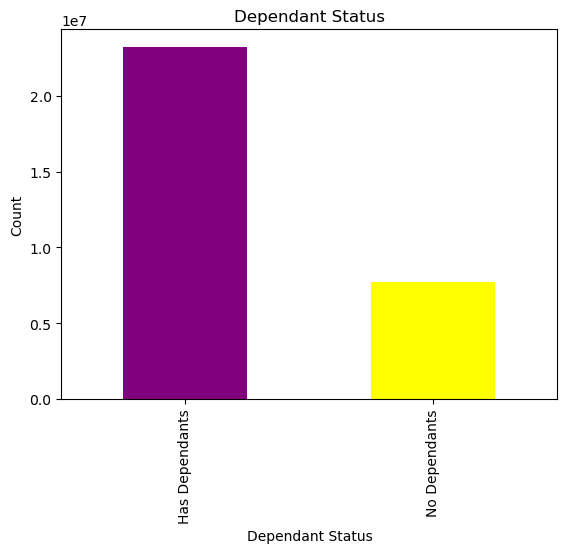

In [105]:
#creating a bar graph for dependant_flag
bar_dependants = df_ords_prods_cust['dependant_flag'].value_counts().plot.bar(color=['purple', 'yellow'])
plt.title('Dependant Status')
plt.xlabel('Dependant Status')
plt.ylabel('Count')

In [106]:
#exporting the dependent status  
bar_dependants.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'bar_dependant_status.png',)), bbox_inches='tight')

## Department Variable

In [108]:
#importing departments csv
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [109]:
#checking import 
df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [110]:
#changing 'Unnamed:0' column into department id
df_departments.rename(columns={'Unnamed: 0':'department_id'}, inplace=True )

In [111]:
#checking to see that it has changed
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [112]:
#column changed successfully

In [113]:
#creating a data dictionary 
combined=zip(df_departments['department_id'], df_departments['department'])
data_dict=dict(combined)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [114]:
#creating new department column in dataframe 
df_ords_prods_cust['department'] = df_ords_prods_cust['department_id'].map(data_dict)

In [115]:
#checking the output 
df_ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_group,income_level,dependant_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,both,Midwest,High Activity,Senior Adult,Low Income,Has Dependants,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,both,Midwest,High Activity,Senior Adult,Low Income,Has Dependants,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,2,married,158302,both,Northeast,High Activity,Senior Adult,High Income,Has Dependants,snacks
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,2,married,57797,both,West,High Activity,Middle Adult,Middle Income,Has Dependants,snacks
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,3,living with parents and siblings,34171,both,South,High Activity,Adult,Low Income,Has Dependants,snacks


In [116]:
#department column added successfully

# 06. Creating an appropriate visualization to show the distribution of profiles.

## Age

In [119]:
#creating a table for age_group counts
age_group_distribution = df_ords_prods_cust['age_group'].value_counts()

In [120]:
age_group_distribution

age_group
Middle Adult    12103910
Adult           10665110
Senior Adult     8195544
Name: count, dtype: int64

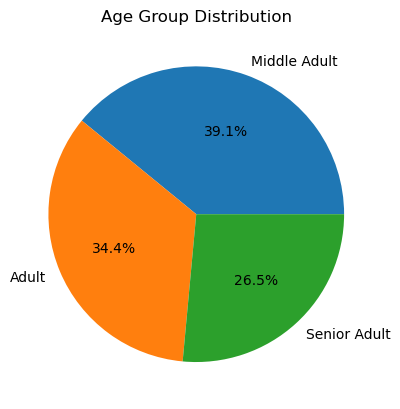

In [121]:
#creating a pie chart
age_group_distribution_pie = plt.pie(age_group_distribution, 
                            labels = age_group_distribution.index,
                            autopct='%.1f%%')
plt.title('Age Group Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_distribution_pie.png'), bbox_inches = 'tight') #saving pie chart 

Middle adults make up the largest age group, followed by adults, then senior adults.

## Income

In [124]:
#creating a table for income_level counts
income_level_distribution = df_ords_prods_cust['income_level'].value_counts()

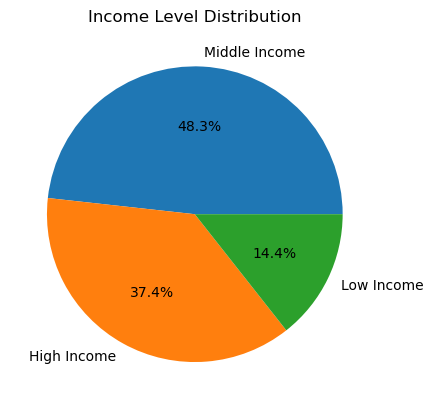

In [125]:
#creating pie chart for income level distribution
income_level_distribution_pie = plt.pie(income_level_distribution, 
                            labels = income_level_distribution.index,
                            autopct='%.1f%%')
plt.title('Income Level Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_level_distribution_pie.png'), bbox_inches = 'tight') #saving pie chart

Nearly half of Instacart Users fall within the middle income category.

## Dependant Status

In [128]:
#creating a table for dependant_flag counts
dependant_status_distribution = df_ords_prods_cust['dependant_flag'].value_counts()

In [129]:
dependant_status_distribution 

dependant_flag
Has Dependants    23224883
No Dependants      7739681
Name: count, dtype: int64

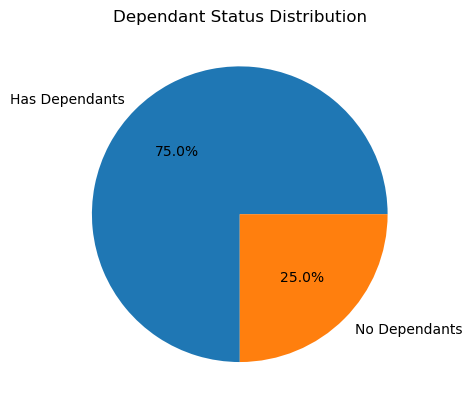

In [130]:
#creating pie chart for dependant status distribution
dependant_status_distribution_pie = plt.pie(dependant_status_distribution, 
                            labels = dependant_status_distribution.index,
                            autopct='%.1f%%')
plt.title('Dependant Status Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependant_status_distribution_pie.png'), bbox_inches = 'tight') #saving pie chart

There are three times more customers with dependants than without.

# 07. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

## Age

In [134]:
#aggregating expenditure by age 
age_price_agg = df_ords_prods_cust.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

In [135]:
age_price_agg

prices           
                  mean  min   max
age_group                        
Adult         7.784839  1.0  25.0
Middle Adult  7.791546  1.0  25.0
Senior Adult  7.796729  1.0  25.0

Amount spent does not seem to differ much based on age group.  

In [137]:
#aggregating frequency by age
age_frequency_agg = df_ords_prods_cust.groupby('age_group').agg({'days_since_last_order': ['mean', 'min', 'max']})

In [138]:
age_frequency_agg

days_since_last_order           
                              mean  min   max
age_group                                    
Adult                    10.811278  0.0  30.0
Middle Adult             10.821972  0.0  30.0
Senior Adult             10.791788  0.0  30.0

Senior adults order only slightly less frequently than adults and middle adults.

## Income

In [141]:
#aggregating expenditure by income
income_price_agg = df_ords_prods_cust.groupby('income_level').agg({'prices': ['mean', 'min', 'max']})

In [142]:
income_price_agg 

prices           
                   mean  min   max
income_level                      
High Income    7.952649  1.0  25.0
Low Income     6.915685  1.0  25.0
Middle Income  7.925840  1.0  25.0

Low income customers spend less on average than middle income or high income customers.

In [144]:
#aggregating frequency by income
income_frequency_agg = df_ords_prods_cust.groupby('income_level').agg({'days_since_last_order': ['mean', 'min', 'max']})

In [145]:
income_frequency_agg

days_since_last_order           
                               mean  min   max
income_level                                  
High Income               10.768566  0.0  30.0
Low Income                11.132305  0.0  30.0
Middle Income             10.747051  0.0  30.0

Low income customers order less frequently on average than middle income or high income customers.

## Dependant status

In [148]:
#aggregating expenditure by dependant status 
dependant_price_agg = df_ords_prods_cust.groupby('dependant_flag').agg({'prices': ['mean', 'min', 'max']})

In [149]:
dependant_price_agg

prices           
                    mean  min   max
dependant_flag                     
Has Dependants  7.790953  1.0  25.0
No Dependants   7.789572  1.0  25.0

There is little difference in amount spend based on dependant status.

In [151]:
#aggregating frequency by dependant status 
dependant_frequency_agg = df_ords_prods_cust.groupby('dependant_flag').agg({'days_since_last_order': ['mean', 'min', 'max']})

In [152]:
dependant_frequency_agg

days_since_last_order           
                                mean  min   max
dependant_flag                                 
Has Dependants             10.816416  0.0  30.0
No Dependants              10.791951  0.0  30.0

There is little difference in order frequency based on dependant status.

## 8. Comparing customer profiles with regions and departments.

### Comparing age with region

In [156]:
#creating age and region crosstab
age_by_region_crosstab = pd.crosstab(df_ords_prods_cust['region'], df_ords_prods_cust['age_group'], dropna = False)

In [157]:
#checking the crosstab
age_by_region_crosstab

age_group,Adult,Middle Adult,Senior Adult
region,,,
Midwest,2483001,2874466,1904046
Northeast,1871737,2108141,1484807
South,3608247,3994431,2708461
West,2702125,3126872,2098230


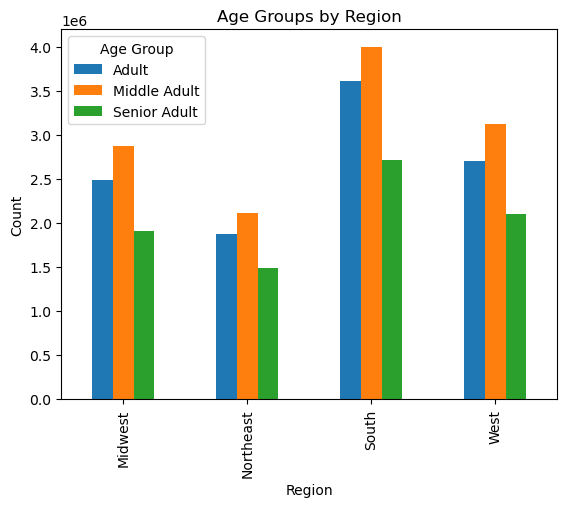

In [158]:
#creating a bar chart of age groups by region 
age_by_region = age_by_region_crosstab.plot.bar()
plt.title('Age Groups by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Age Group')


There are more people of all age groups in the South than any region.  In each region, there are more middle adults than there are adults and seniors.

In [160]:
#saving age_by_region bar chart 
age_by_region.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'age_group_by_region.png',)), bbox_inches='tight')

### Comparing Income Level With Region

In [162]:
#creating region and income_level crosstab
income_level_by_region_crosstab = pd.crosstab(df_ords_prods_cust['region'], df_ords_prods_cust['income_level'], dropna = False)

In [163]:
#checking the crosstab 
income_level_by_region_crosstab

income_level,High Income,Low Income,Middle Income
region,,,
Midwest,2753494,1025408,3482611
Northeast,2058653,789479,2616553
South,3810024,1509183,4991932
West,2948289,1128318,3850620


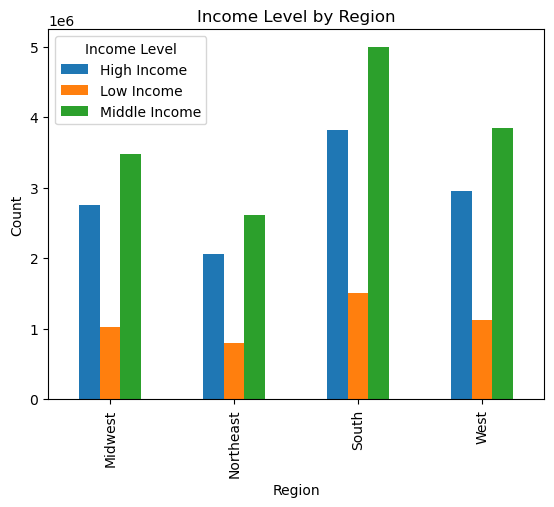

In [164]:
#creating income_level_by_region bar chart 
income_level_by_region = income_level_by_region_crosstab.plot.bar()
plt.title('Income Level by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Income Level')


In each region, middle income customers make up the largest group.  

In [166]:
#saving income_level_by_region bar chart 
income_level_by_region.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'income_level_by_region.png',)), bbox_inches='tight')

### Comparing Dependant Status with Region

In [168]:
#creating region and dependant_flag crosstab
dependant_status_by_region_crosstab = pd.crosstab(df_ords_prods_cust['region'], df_ords_prods_cust['dependant_flag'], dropna = False)

In [169]:
#checking the cross tab
dependant_status_by_region_crosstab

dependant_flag,Has Dependants,No Dependants
region,,
Midwest,5438697,1822816
Northeast,4110203,1354482
South,7729206,2581933
West,5946777,1980450


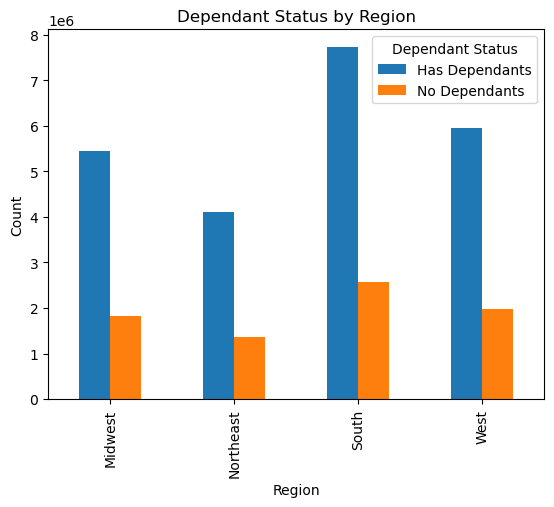

In [170]:
#creating dependant_status_by_region bar chart 
dependant_status_by_region = dependant_status_by_region_crosstab.plot.bar()
plt.title('Dependant Status by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Dependant Status')


For each region, there are more than twice as many people with dependants than there are people with no dependants. 

In [172]:
dependant_status_by_region.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'dependant_status_by_region.png',)), bbox_inches='tight')

### Comparing age with departments

In [174]:
#creating a departments and age_group crosstab 
departments_by_age_group_crosstab = pd.crosstab(df_ords_prods_cust['department'], df_ords_prods_cust['age_group'], dropna = False)

In [175]:
#checking the crosstab
departments_by_age_group_crosstab

age_group,Adult,Middle Adult,Senior Adult
department,,,
alcohol,51656,56278,36693
babies,141456,162732,106204
bakery,386002,438829,295997
beverages,874173,1013708,684020
breakfast,231939,263615,175296
bulk,11624,12882,8945
canned goods,349716,394849,267509
dairy eggs,1793303,2015807,1368072
deli,345845,392790,265199


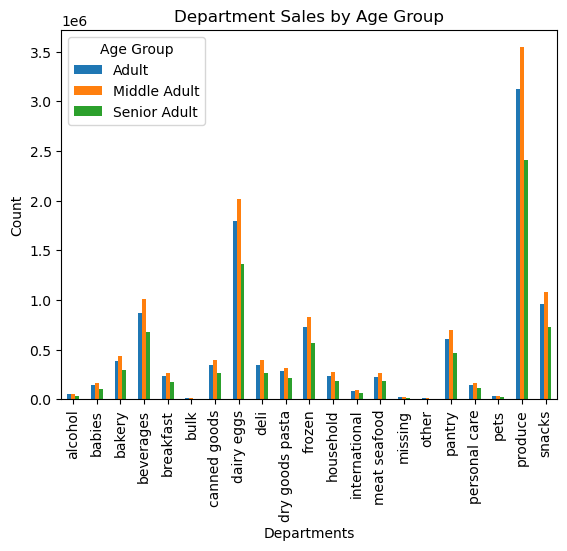

In [176]:
#creating departments by age group chart 
departments_by_age_group = departments_by_age_group_crosstab.plot.bar()
plt.title('Department Sales by Age Group')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.legend(title='Age Group')

For all three age groups, the department that accounts for the most sales is produce, followed by dairy eggs, snacks, beverages and frozen. Within each of these groups, middle adults make up the most sales.    

In [178]:
#exporting the bar graph
departments_by_age_group.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'departments_by_age_group.png',)), bbox_inches='tight')

### Comparing income level with departments

In [180]:
#creating a departments and income level crosstab
departments_by_income_level_crosstab = pd.crosstab(df_ords_prods_cust['department'], df_ords_prods_cust['income_level'], dropna = False)

In [181]:
#checking the crosstab
departments_by_income_level_crosstab

income_level,High Income,Low Income,Middle Income
department,,,
alcohol,57718,22199,64710
babies,158179,43438,208775
bakery,429000,144086,547742
beverages,915388,479742,1176771
breakfast,242427,116540,311883
bulk,11362,5974,16115
canned goods,397167,112945,501962
dairy eggs,1962285,680816,2534081
deli,376328,141758,485748


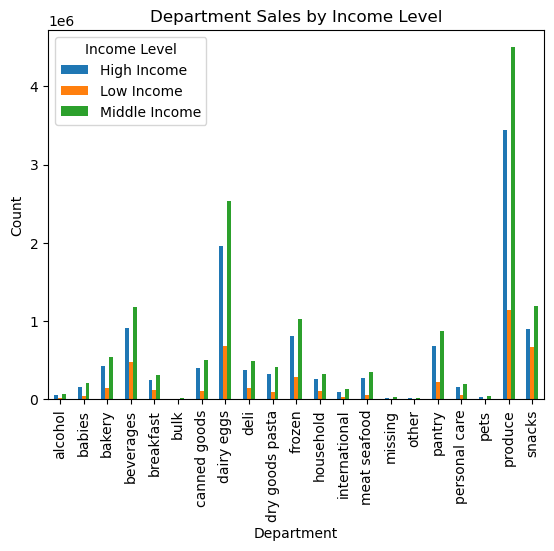

In [182]:
#creating a departments by income level chart 
departments_by_income_level = departments_by_income_level_crosstab.plot.bar()
plt.title('Department Sales by Income Level')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Income Level')

Produce, dairy/eggs, beverages, snacks, and frozen make up the most sales for all income levels.  Within each of these categories, the middle income level accounts for the most sales.  

In [184]:
#saving departments by income level chart
departments_by_income_level.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'departments_by_income_level.png',)), bbox_inches='tight')

### Comparing dependant status with departments

In [186]:
#creating a departments and dependant status crosstab
departments_by_dependant_status_crosstab = pd.crosstab(df_ords_prods_cust['department'], df_ords_prods_cust['dependant_flag'], dropna = False)

In [187]:
#checking the crosstab
departments_by_dependant_status_crosstab

dependant_flag,Has Dependants,No Dependants
department,,
alcohol,107800,36827
babies,307064,103328
bakery,839433,281395
beverages,1926560,645341
breakfast,504418,166432
bulk,25451,8000
canned goods,761054,251020
dairy eggs,3882806,1294376
deli,750452,253382


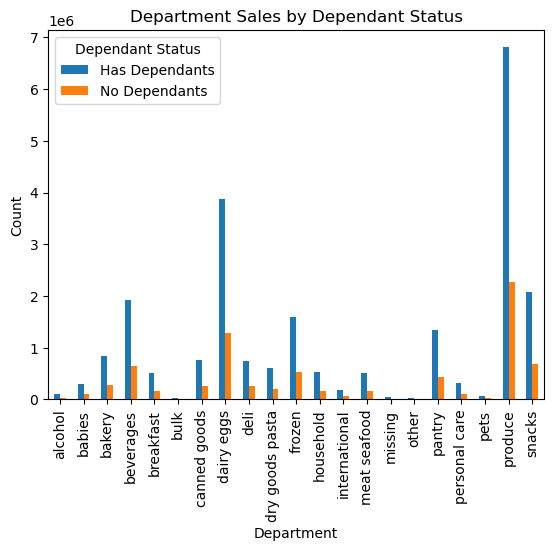

In [188]:
#creating a departments by dependant status chart 
departments_by_dependant_status = departments_by_dependant_status_crosstab.plot.bar()
plt.title('Department Sales by Dependant Status')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Dependant Status')


Produce, dairy eggs, beverages,snacks, and frozen make up the most sales regardless dependant status.  Within these departments, those who have dependants make up the most sales.  

In [190]:
#saving departments by dependant status chart
departments_by_dependant_status.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'departments_by_dependant_status.png',)), bbox_inches='tight')

In [191]:
df_ords_prods_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_final.pkl'))

## Additional charts

### Deparments by region

In [194]:
#creating department and region crosstab
department_by_region_crosstab = pd.crosstab(df_ords_prods_cust['department'], df_ords_prods_cust['region'], dropna = False)

In [195]:
#checking crosstab
department_by_region_crosstab

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


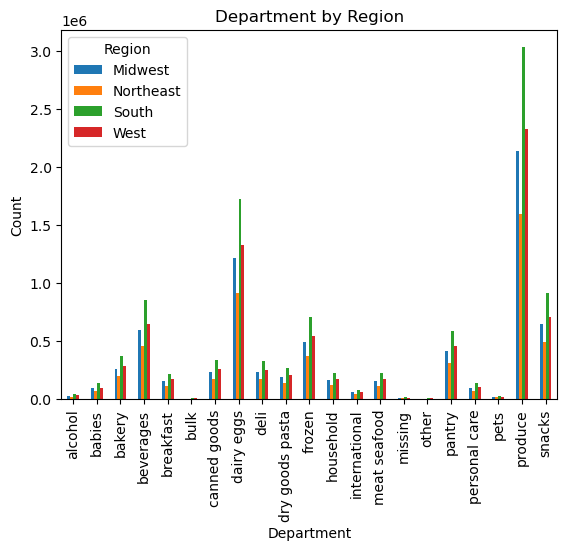

In [196]:
#creating a bar chart of department by region 
department_by_region = department_by_region_crosstab.plot.bar()
plt.title('Department by Region')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Region')


Produce, dairy/eggs, snacks, beverages, and frozen make up the most sales regardless of region.

In [198]:
#saving department by region bar chart
department_by_region.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'department_by_region.png',)), bbox_inches='tight')

### Orders by Day of Week

In [200]:
#checking to see which days are busiest  
df_ords_prods_cust['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: count, dtype: int64

Text(0, 0.5, 'Count')

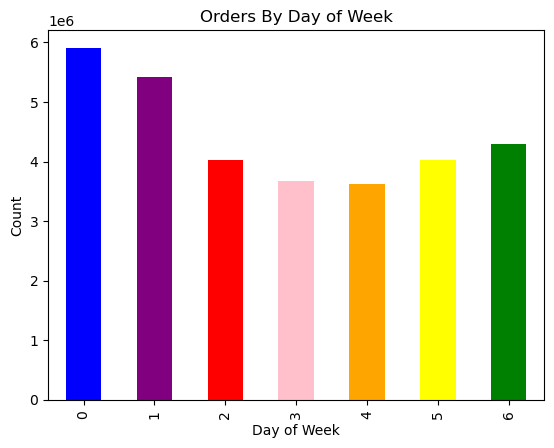

In [201]:
#creating an orders by day of the week chart
orders_by_day_of_week = df_ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['blue', 'purple', 'red', 'pink', 'orange', 'yellow', 'green'])
plt.title('Orders By Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')

We know that 0=Saturday, 1=Sunday, 2=Monday, 3=Tuesday, 4=Wednesday, 5=Thursday 6=Friday.  Saturday and Sunday are the busiest order days while Tuesday and Wednesday are the slowest.

In [203]:
#saving orders by day of week chart
orders_by_day_of_week.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'orders_by_day_of_week.png',)), bbox_inches='tight')

### Orders by Hour of Day

In [205]:
#checking to see which hours are the busiest for ordering  
df_ords_prods_cust['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2649744
11    2614880
14    2567903
13    2539276
15    2535966
12    2495795
16    2413681
9     2363611
17    1982345
8     1659110
18    1551184
19    1193878
20     930909
7      863213
21     763111
22     607060
23     384554
6      281013
0      208042
1      109621
5       84418
2       65691
4       50763
3       48796
Name: count, dtype: int64

Text(0, 0.5, 'Count')

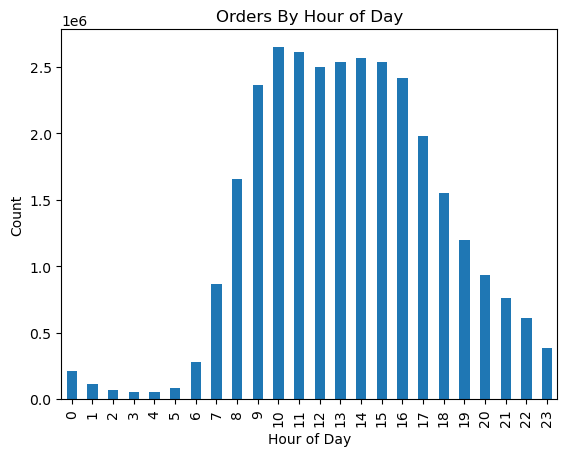

In [206]:
#creating an orders by hour of the day chart
orders_by_hour_of_day = df_ords_prods_cust['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title('Orders By Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

The busiest hours of the day are 9am - 4 pm.  The least busiest hours of the day are 11pm to 6 am.

In [208]:
#saving orders by hour of day chart
orders_by_hour_of_day.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'orders_by_hour_of_day.png',)), bbox_inches='tight')

In [209]:
#determining when people spend the most money
#first, we must create a random sample for our line chart  
np.random.seed(4)

In [210]:
#Splitting the dataframe into two samples with a 70/30 split.
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.7

In [211]:
#storing 70% of the sample in the big dataframe
big = df_ords_prods_cust[dev]

In [212]:
#storing 30% of the sample in the small dataframe
small = df_ords_prods_cust[~dev]

In [213]:
#checking to see if the rows in both samples add up to the same number of rows in the original dataframe
len(df_ords_prods_cust)

30964564

In [214]:
len(big) + len(small)

30964564

In [215]:
#creating a new data frame from small sample that only includes order_hour_of_day and prices
df_2 = small[['order_hour_of_day','prices']]

Text(0, 0.5, 'Average Amount Spent ($)')

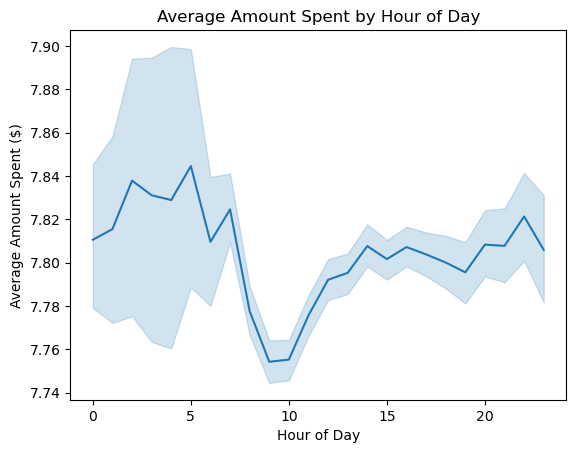

In [322]:
#creating a prices by hour of day chart 
prices_by_hour_of_day = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Average Amount Spent by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Amount Spent ($)')


People spend the most amount of money from 2-5 am.  Amount spent drops significantly after 7 am, reaching its lowest aroud 9-10am.  After this, amount spent starts to increase again.

In [324]:
prices_by_hour_of_day.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'Average Amount Spent by Hour of Day.png',)), bbox_inches='tight')

### Orders by Department

In [220]:
#checking to see what the most popular products are
orders_by_department = df_ords_prods_cust['department'].value_counts(dropna = False)

In [221]:
orders_by_department

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

Text(0, 0.5, 'Count')

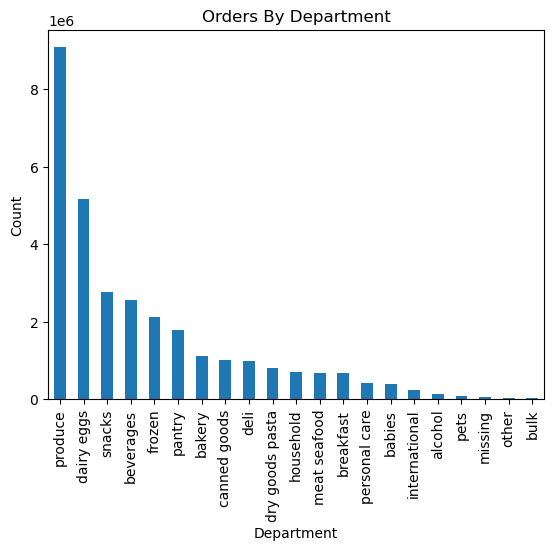

In [222]:
#creating an orders by department chart 
orders_by_department = df_ords_prods_cust['department'].value_counts().plot.bar()
plt.title('Orders By Department')
plt.xlabel('Department')
plt.ylabel('Count')

Produce, dairy/eggs, snacks, beverages, and frozen are the most popular departments.  

In [224]:
#saving orders by department graph
orders_by_department.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'orders_by_department.png',)), bbox_inches='tight')

In [225]:
#checking dataframe columns
df_ords_prods_cust.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spent', 'spending_flag', 'median_days_since_last_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', '_merge', 'region',
       'activity_flag', 'age_group', 'income_level', 'dependant_flag',
       'department'],
      dtype='object')

### Loyalty Distribution

In [227]:
#creating a value count table for loyalty
loyalty_distribution = df_ords_prods_cust['loyalty_flag'].value_counts()

In [228]:
#checking value count table
loyalty_distribution

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: count, dtype: int64

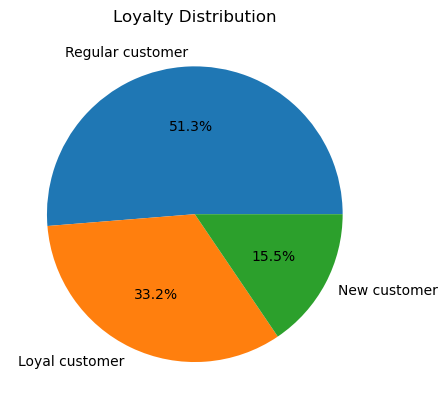

In [229]:
#creating a loyalty distribution pie
loyalty_distribution_pie = plt.pie(loyalty_distribution, 
                            labels = loyalty_distribution.index,
                            autopct='%.1f%%')
plt.title('Loyalty Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_distribution_pie.png'), bbox_inches = 'tight') #saving pie chart

More than half of the customers are regular customers meaning they have made between 10-40 orders.  The next largest group is the loyal customer group, who have placed more than 40 orders.  The smallest group is the new customer group, who have placed less than 10 orders.